In [1]:
base_path="../eit_dual_experiments/exp_0.1a" #Don't add '/' at start and end
T=200 #Training time period
C=1000000 #Capital available
file=1 #Index_file
m=8 #Inital Size of Kernel
lbuck=2 #Size Of Buckets
pho=0.1 #Transaction Cost Proportion
lamda=1/(100*C) # lower_bound for capital invested in jth stock
nuh=0.20  # upper_bound
xii=1.2 # Limit for Tracking Error
k=15 #Cardinality constraint for stocks in portfolio
p=3 #If stock not selected in optimal soln in last p iters then it is to be dropped from kernel
f=12
w_return=100
w_risk=110
w_risk_down=1
#cj,cb are declared in script

### Test Linear Relaxation script

In [2]:
import sys
from IPython.display import Image, display
sys.path.insert(0,"..")

In [12]:
!rm -r $base_path

rm: ../eit_dual_experiments/exp_0.1a: No such file or directory


In [77]:
%%time
!python ../src_dual/linear_relaxation.py $file $T $xii $k $pho $nuh $C $lamda $f\
$w_return $w_risk $w_risk_down $base_path

Running Linear Relaxation of EIT ...with input args=14
/Users/ashish1610dhiman/data_projects/index_tracking_kgp/eit_paper/notebooks
Solving LP(EIT)
***************************************************
Welcome to the CBC MILP Solver 
Version: Trunk
Build Date: Sep  8 2020 

Starting solution of the Linear programming problem using Dual Simplex

Coin0506I Presolve 295 (-48) rows, 507 (-48) columns and 6953 (-144) elements
Clp0014I Perturbing problem by 0.001% of 0.0072373193 - largest nonzero change 9.4262623e-05 ( 111391.65%) - largest zero change 9.3917903e-05
Clp0000I Optimal - objective value 0.42238327
Coin0511I After Postsolve, objective 0.42238327, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 0.4223832651 - 492 iterations time 0.012, Presolve 0.00
***************************************************

Optimisation Status=0
OPTIMAL(0), ERROR(-1), INFEASIBLE(1), UNBOUNDED(2)
CPU times: user 30 ms, sys: 16.2 ms, total: 46.2 ms
Wall time: 2.2 s


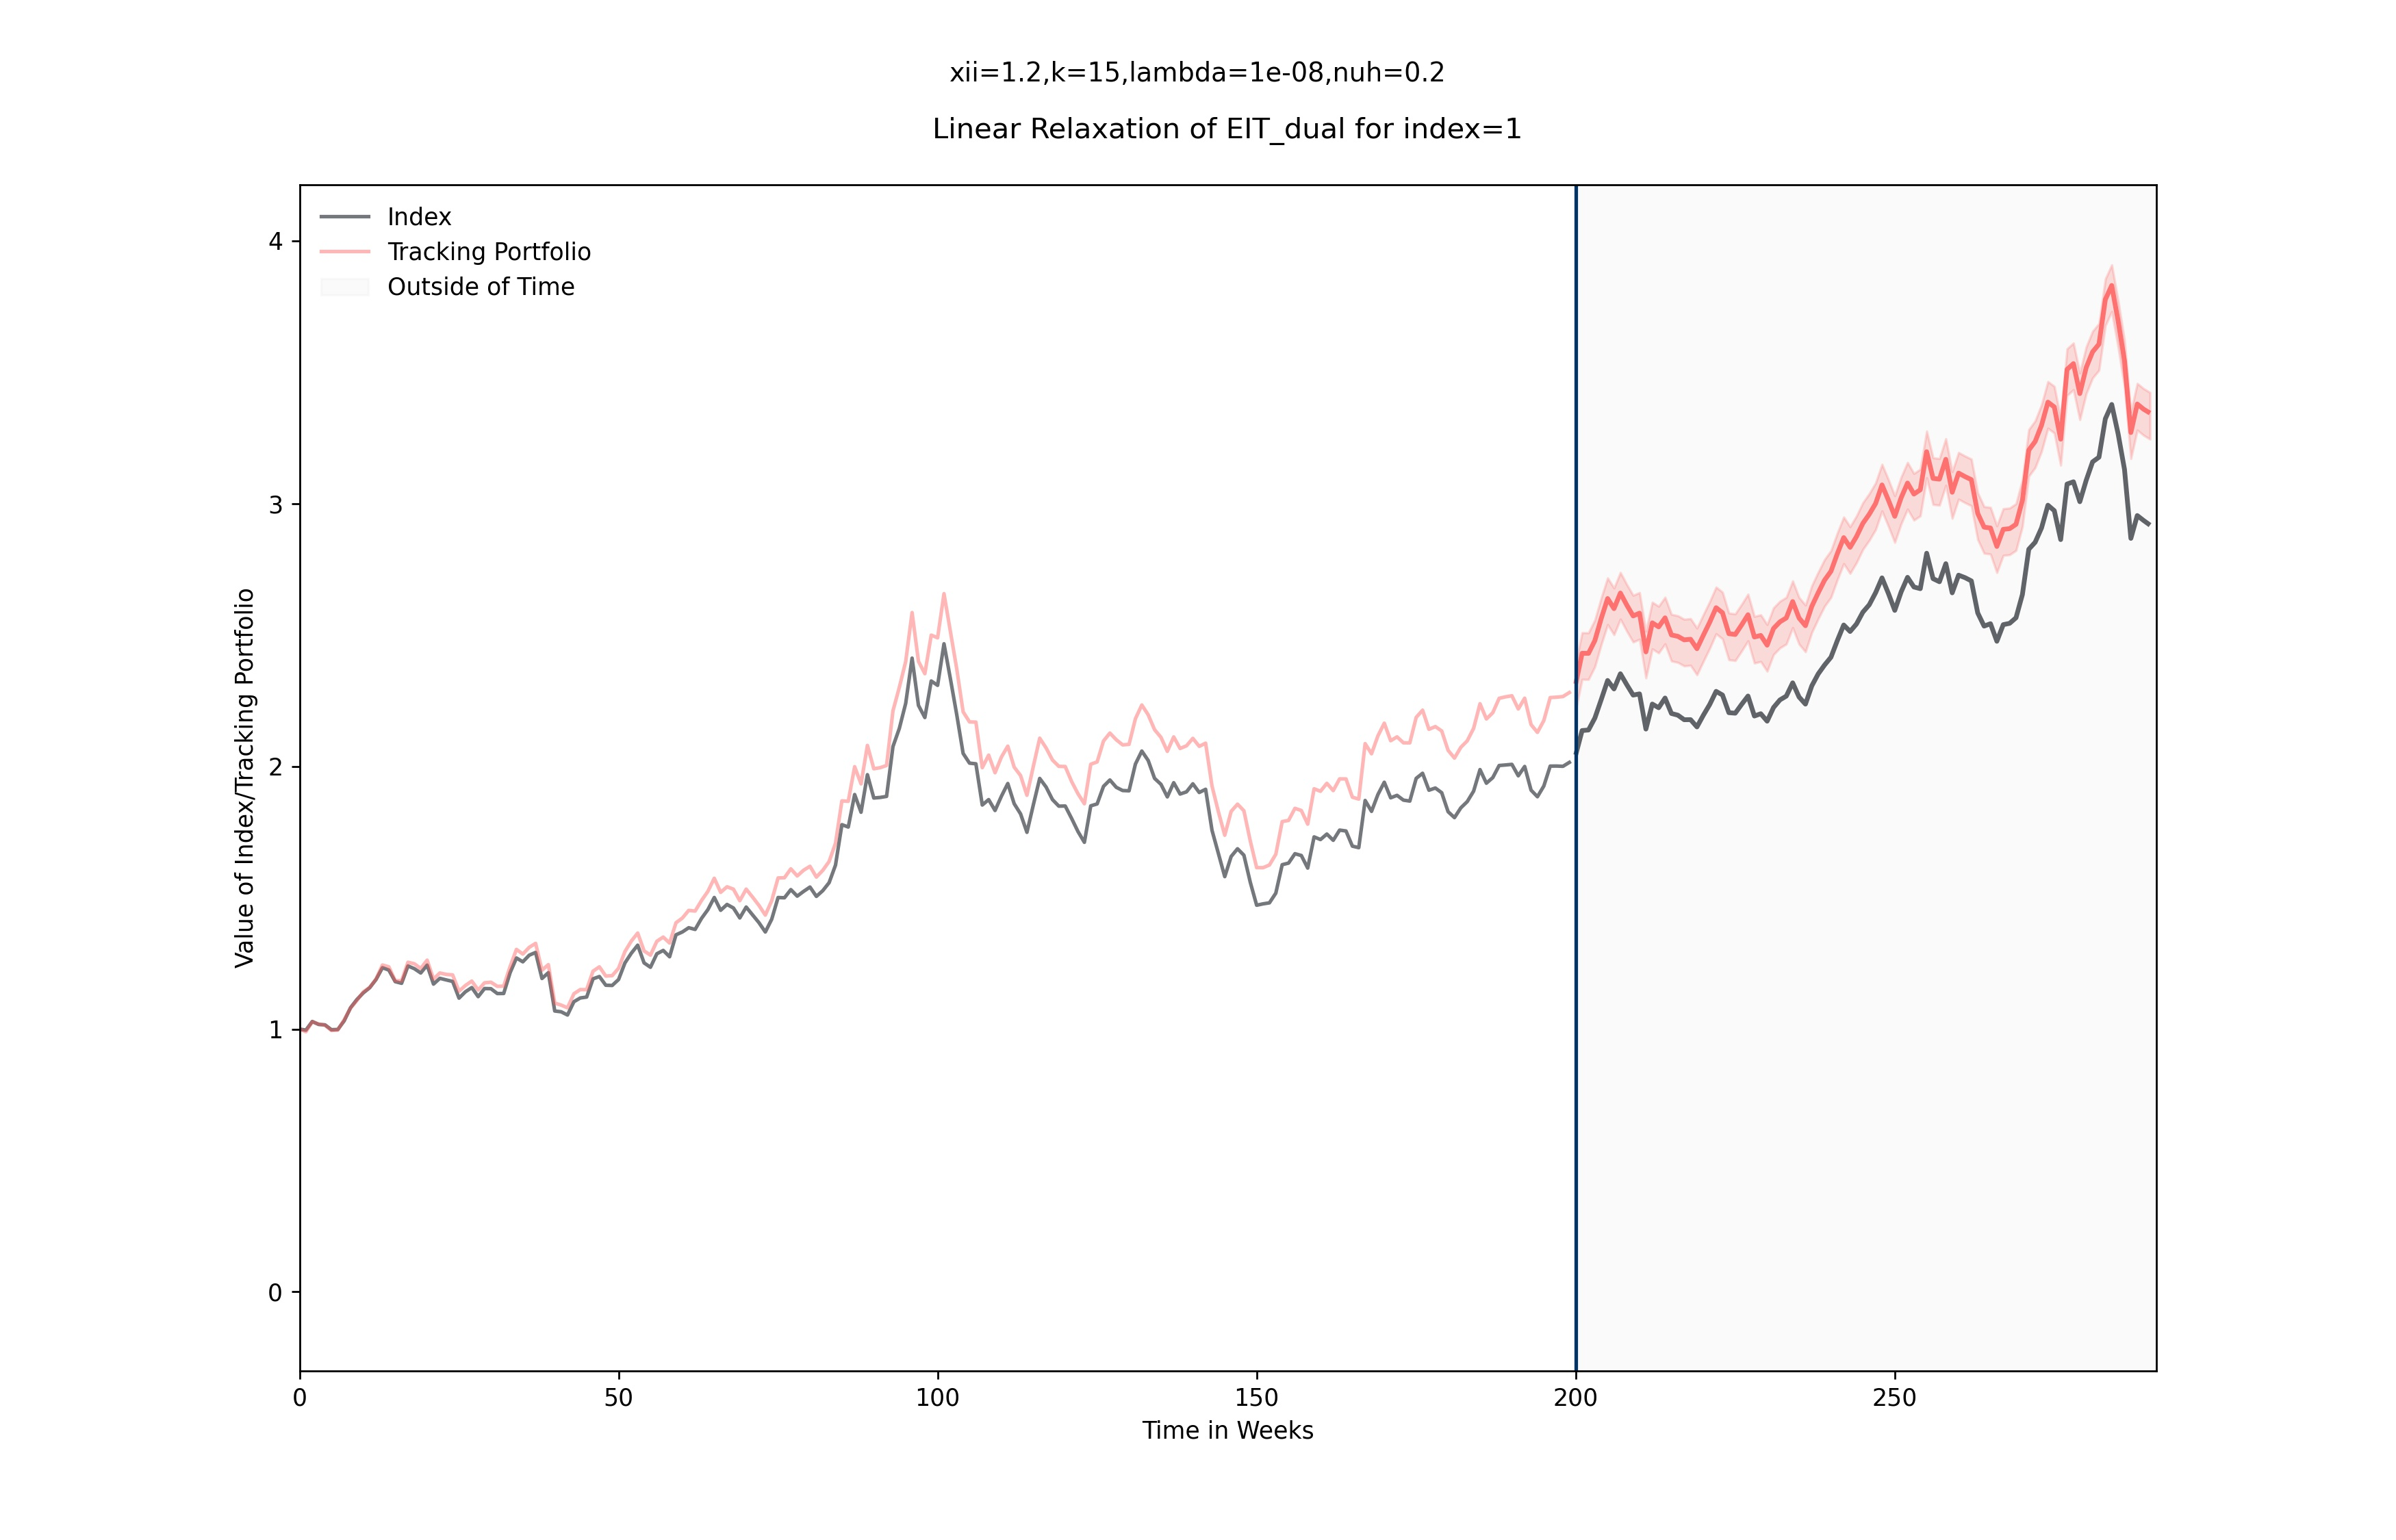

In [78]:
Image(filename=base_path+'/LP_EIT_Dual for index_{}.jpg'.format(file))

### Test step_1 of eit_dual_experiment

In [3]:
from eit_dual_exp import TestEitDual

In [4]:
base_path="../eit_dual_experiments/exp_0.2" #Don't add '/' at start and end

In [5]:
!rm -r $base_path

rm: ../eit_dual_experiments/exp_0.2: No such file or directory


In [6]:
test_eit_dual=TestEitDual(output=base_path,T=T,C=C,file=file,m=m,lbuck=lbuck,pho=pho,lamda=lamda,\
                          nuh=nuh,xii=xii,k=k,p=p,f=f,w_risk=w_risk,w_return=w_return,w_risk_down=w_risk_down)

In [7]:
test_eit_dual.give_params()

params(output='../eit_dual_experiments/exp_0.2', T=200, C=1000000, file=1, m=8, lbuck=2, pho=0.1, lamda=1e-08, nuh=0.2, xii=1.2, k=15, p=3, f=12, w_risk=110, w_return=100, w_risk_down=1)

In [8]:
result=test_eit_dual.step_1(from_root=False,verbose=True)

/Users/ashish1610dhiman/data_projects/index_tracking_kgp/eit_paper/notebooks
+----------------------------------------------------+
    Step 1: Solving Linear Relaxation of EIT-Dual
+----------------------------------------------------+


FileNotFoundError: [Errno 2] No such file or directory: '../eit_dual_experiments/exp_0.2/EIT_dual_LP_details.txt'

In [51]:
result[2]

,security,X_0,X_1,y,w,b,s,weights,q_T
0,security_1,0.000000,139.973331,0.013814,0.013814,2762.868151,0.000000,0.002763,19.738533
1,security_2,4636.749623,110.778490,0.018946,0.774058,0.000000,154811.625579,0.003789,34.205173
2,security_3,9050.041432,168.543520,0.006657,0.350773,0.000000,70154.624723,0.001331,7.898963
3,security_4,2262.510359,995.496186,0.416141,0.529642,0.000000,105928.410762,0.083228,83.604756
4,security_5,0.000000,788.963112,0.044464,0.044464,8892.840444,0.000000,0.008893,11.271554
5,security_6,7792.048123,0.000000,0.000000,0.598202,0.000000,119640.387270,0.000000,15.354164
6,security_7,0.000000,597.143524,0.108381,0.108381,21676.148408,0.000000,0.021676,36.299730
7,security_8,6694.772184,1646.760194,0.112539,0.344978,0.000000,68995.565683,0.022508,13.667869
8,security_9,0.000000,1879.405869,0.078730,0.078730,15746.087269,0.000000,0.015746,8.378226
9,security_10,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,15.265412
